In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ds_path = "crowdai"

In [14]:
test_img_path = ds_path + "\\2546.jpg"
test_img_path

'crowdai\\1005.jpg'

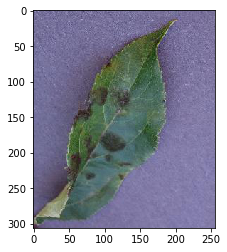

In [15]:
main_img = cv2.imread(test_img_path)
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

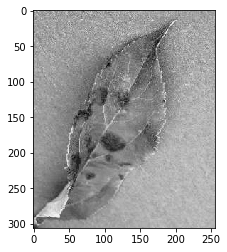

In [16]:
gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap='Greys_r')

In [17]:
gs.shape

(306, 256)

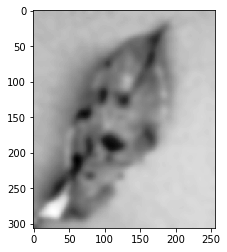

In [18]:
blur = cv2.GaussianBlur(gs, (25,25),0)
plt.imshow(blur,cmap='Greys_r')

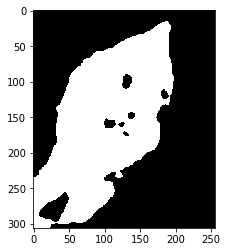

In [19]:
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')

In [20]:
kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

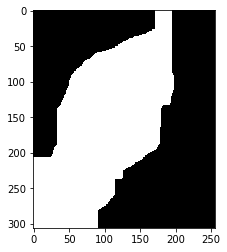

In [21]:
plt.imshow(closing,cmap='Greys_r')

In [33]:
#1. Color based features

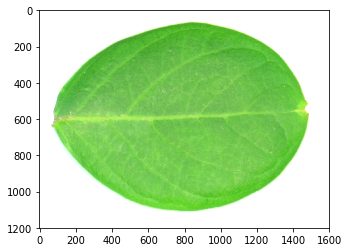

In [34]:
plt.imshow(img,cmap="Greys_r")

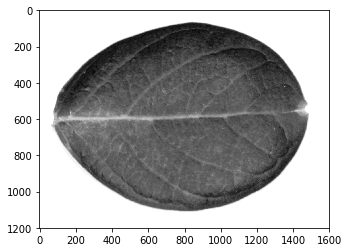

In [35]:
red_channel = img[:,:,0]
plt.imshow(red_channel,cmap="Greys_r")

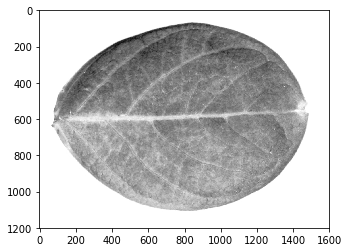

In [36]:

green_channel = img[:,:,1]
plt.imshow(green_channel,cmap="Greys_r")

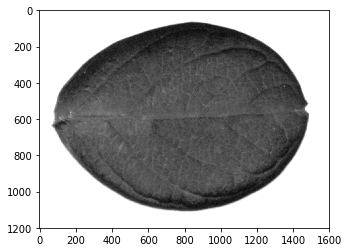

In [37]:
blue_channel = img[:,:,2]
plt.imshow(blue_channel,cmap="Greys_r")

In [38]:
np.mean(blue_channel)

150.88683958333334

In [39]:
blue_channel[blue_channel == 255] = 0
green_channel[green_channel == 255] = 0
red_channel[red_channel == 255] = 0

In [40]:
red_mean = np.mean(red_channel)
red_mean


67.0772890625

In [41]:

green_mean = np.mean(green_channel)
green_mean

115.23096614583334

In [42]:
blue_mean = np.mean(blue_channel)
blue_mean

45.85300364583333

In [43]:
red_var = np.std(red_channel)
red_var

59.44666555553515

In [44]:
#3. Texture based features
#Using Haralick moments - calculating texture based features such as contrast, correlation, entropy

In [45]:
import mahotas as mt

In [46]:
textures = mt.features.haralick(gs)
ht_mean = textures.mean(axis=0)
ht_mean

array([ 1.68496423e-01,  1.35870563e+02,  9.79023945e-01,  3.23873390e+03,
        6.89656782e-01,  3.89063973e+02,  1.28190650e+04,  4.99952808e+00,
        6.19018455e+00,  1.42997245e-03,  1.91905173e+00, -5.95163221e-01,
        9.97290532e-01])

In [47]:
print(ht_mean[1]) #contrast
print(ht_mean[2]) #correlation
print(ht_mean[4]) #inverse difference moments
print(ht_mean[8]) #entropy

135.8705632644934
0.9790239445095995
0.6896567818764012
6.190184551373692
